In [1]:
import copy
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools 
from typing import Tuple

import torch

from torch.utils.data import Dataset, Sampler, DataLoader

import sys
sys.path.append("..")

from src.data import METADATA, TRAIN_DATA, get_dataloaders, DATA_ORDER

/home/tranlin/anaconda3/envs/b2p/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# correcting the file paths from ./data/[...] to ../data/[...]
metadata = dict(METADATA)
for country in metadata:
    md = metadata[country]
    for data_name in md:
        data = md[data_name]
        data["fp"] = os.path.join("../", data["fp"])

train_data = dict(TRAIN_DATA)
for version in train_data:
    for tile_size in train_data[version]:
        train_data[version][tile_size] = os.path.join(
            "../", train_data[version][tile_size])

In [3]:
(dataloader_train, dataloader_validation, dataloader_test, 
 dataloader_unlab) = get_dataloaders(
    batch_size=64, tile_size=1200, train_data=train_data,
    train_metadata=metadata, transform=False, num_workers=0,
    stats_fp="../data/ground_truth/stats.json", use_augment=False
)

Text(0.5, 1.0, 'Admin bounds')

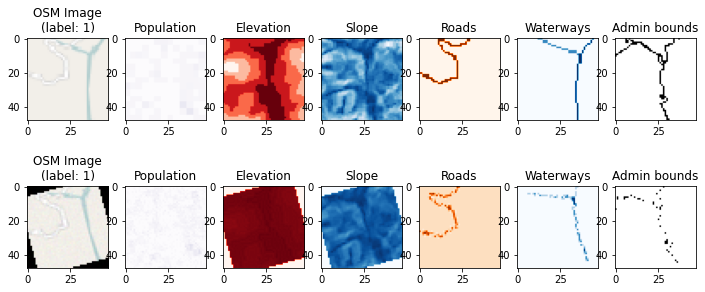

In [8]:
img, lab = dataloader_train.dataset[10]
img = dataloader_train.dataset.convert_tensor_2_numpy(img)

img_aug = copy.deepcopy(img)
img_aug = dataloader_train.dataset.augment(img_aug, rotate=True)

fig, axes = plt.subplots(2, 7, figsize=(12, 5))
axes[0, 0].imshow(img[:, :, 1:4].astype(int))
axes[0, 0].set_title("OSM Image\n(label: {})".format(lab))
axes[0, 1].imshow(
    img[:, :, 0:1].astype(int), vmin=0, vmax=100, cmap="Purples")
axes[0, 1].set_title("Population")
axes[0, 2].imshow(
    img[:, :, 4:5].astype(int), cmap="Reds")
axes[0, 2].set_title("Elevation")
axes[0, 3].imshow(
    img[:, :, 5:6].astype(int), cmap="Blues")
axes[0, 3].set_title("Slope")
axes[0, 4].imshow(
    img[:, :, 6:7].astype(int), cmap="Oranges")
axes[0, 4].set_title("Roads")
axes[0, 5].imshow(
    img[:, :, 7:8].astype(int), cmap="Blues")
axes[0, 5].set_title("Waterways")
axes[0, 6].imshow(
    img[:, :, 8:9].astype(int), cmap="Greys")
axes[0, 6].set_title("Admin bounds")

axes[1, 0].imshow(img_aug[:, :, 1:4].astype(int))
axes[1, 0].set_title("OSM Image\n(label: {})".format(lab))
axes[1, 1].imshow(
    img_aug[:, :, 0:1].astype(int), vmin=0, vmax=100, cmap="Purples")
axes[1, 1].set_title("Population")
axes[1, 2].imshow(img_aug[:, :, 4:5].astype(int), cmap="Reds")
axes[1, 2].set_title("Elevation")
axes[1, 3].imshow(img_aug[:, :, 5:6].astype(int), cmap="Blues")
axes[1, 3].set_title("Slope")
axes[1, 4].imshow(img_aug[:, :, 6:7].astype(int), cmap="Oranges")
axes[1, 4].set_title("Roads")
axes[1, 5].imshow(img_aug[:, :, 7:8].astype(int), cmap="Blues")
axes[1, 5].set_title("Waterways")
axes[1, 6].imshow(img_aug[:, :, 8:9].astype(int), cmap="Greys")
axes[1, 6].set_title("Admin bounds")

In [ ]:
(dataloader_train, dataloader_validation, dataloader_test, 
 dataloader_unlab) = get_dataloaders(
    batch_size=64, tile_size=1200, train_data=train_data,
    train_metadata=metadata, transform=False, num_workers=0,
    stats_fp="../data/ground_truth/stats.json", use_augment=True
)

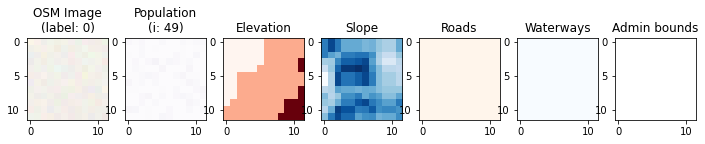

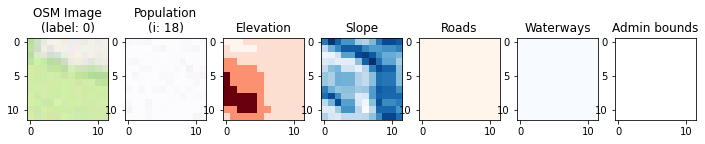

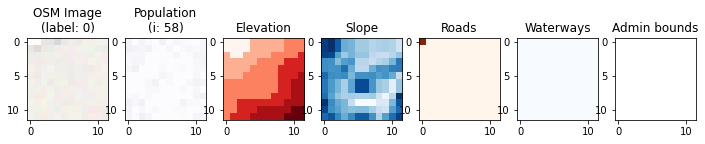

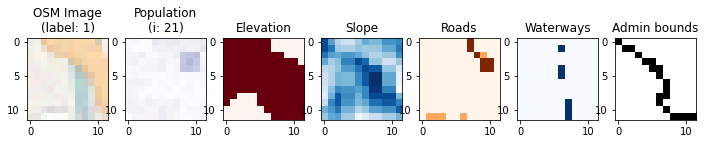

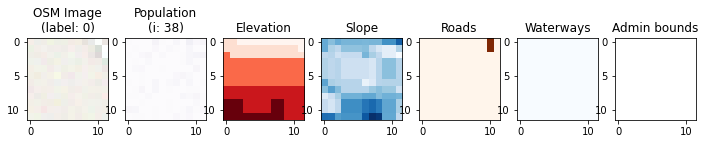

In [6]:
# label = 1 => bridge site, label = 0 => no bridge site
imgs, labs = next(iter(dataloader_train))
indeces = np.random.choice(len(imgs), 10, replace=False)

for j in range(5):
    i = indeces[j]
    img, lab = imgs[i], labs[i].numpy()
    img = dataloader_train.dataset.convert_tensor_2_numpy(img)
    fig, axes = plt.subplots(1, 7, figsize=(12, 20))
    
    axes[0].imshow(img[:, :, 1:4].astype(int))
    axes[0].set_title("OSM Image\n(label: {})".format(lab))
    axes[1].imshow(
        img[:, :, 0:1].astype(int), vmin=0, vmax=100, cmap="Purples")
    axes[1].set_title("Population\n(i: {})".format(i))
    axes[2].imshow(
        img[:, :, 4:5].astype(int), cmap="Reds")
    axes[2].set_title("Elevation")
    axes[3].imshow(
        img[:, :, 5:6].astype(int), cmap="Blues")
    axes[3].set_title("Slope")
    axes[4].imshow(
        img[:, :, 6:7].astype(int), cmap="Oranges")
    axes[4].set_title("Roads")
    axes[5].imshow(
        img[:, :, 7:8].astype(int), cmap="Blues")
    axes[5].set_title("Waterways")
    axes[6].imshow(
        img[:, :, 8:9].astype(int), cmap="Greys")
    axes[6].set_title("Admin bounds")